# Diffusion Models

Implement a Score matching generative model in JAX to emulate posterior distribtions. Package name is fusions for diffusion meets ns (primarily constricted by what is available on pypi)

In [1]:
from fusions.model import NestedDiffusionModel, DiffusionModel
import numpy as np
import matplotlib.pyplot as plt
import anesthetic as ns

Package wraps up everything in a class, designed to wrap around anesthetic (although currently just taking numpy arrays)

In [2]:
chains=ns.read_chains("data/gaussian")
dims=5
model = NestedDiffusionModel(chains,steps=1000)


In [3]:
chains

,,0,1,2,3,4,5,6,7,8,9,logL,logL_birth,nlive
,labels,,,,,,,,,,,$\ln\mathcal{L}$,$\ln\mathcal{L}_\mathrm{birth}$,$n_\mathrm{live}$
,weights,,,,,,,,,,,,,
0,0.000000,-4.044144,-1.081816,0.619552,0.817275,0.854336,0.965436,-0.258560,1.555665,0.233862,-2.214420,-2125.668355,-inf,200
1,0.000000,0.916070,-1.039357,-2.236238,-3.040561,0.976432,-0.268624,0.313397,1.052069,-1.368459,1.703437,-1943.859316,-inf,200
2,0.000000,-1.133414,1.678576,-1.200285,-1.084008,-1.129228,-0.915476,-2.441769,-0.924533,0.221319,1.584871,-1931.010582,-inf,200
3,0.000000,-1.269232,-0.072427,-1.476309,-0.921546,-0.086829,-1.192130,-0.544455,-2.033772,-0.994920,0.398770,-1888.207845,-inf,200
4,0.000000,-1.304118,1.561034,0.161002,-1.033146,-1.606468,-0.904959,-1.390101,-1.181200,-1.404584,0.312255,-1866.618622,-inf,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7100,0.006892,0.991722,0.991872,1.012538,1.019070,0.978702,0.939796,1.009820,0.950820,0.977360,1.009261,13.444119,12.975972,5
7101,0.007171,0.982518,1.020035,0.982163,0.981689,1.013988,1.025413,1.006946,0.978489,1.065853,0.998062,13.483802,12.115496,4


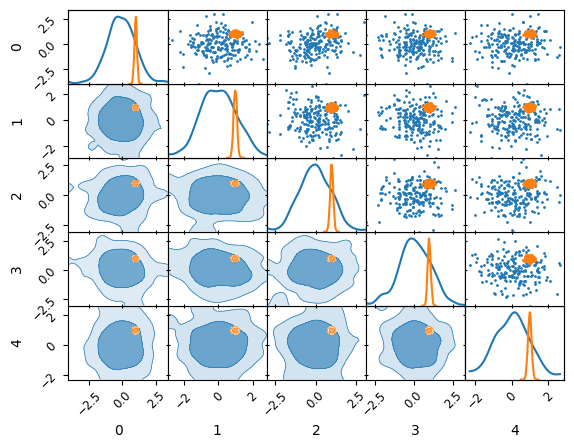

In [4]:
a=chains.set_beta(0.0).plot_2d(np.arange(dims))
a=chains.plot_2d(a);

## Train the model and use it to make predictions

In [5]:
from fusions.network import ScorePriorApprox
model.score_model= ScorePriorApprox
model.train(n_epochs=1000,batch_size=128,lr=1e-2,restart=True)

100%|██████████| 1000/1000 [01:10<00:00, 14.09it/s, loss=2.5545835]


In [6]:
# x0=np.random.rand(1000,5)
# x1,x1_t=model.predict(x0,history=True)
# x1,x1_t=model.sample_posterior(1000,history=True)
# x1

Accuracy needs adjusting and plenty to play around with in terms of beta schedule etc. We can do cool things like plot trajectories of prior samples as a function of time as we diffuse them

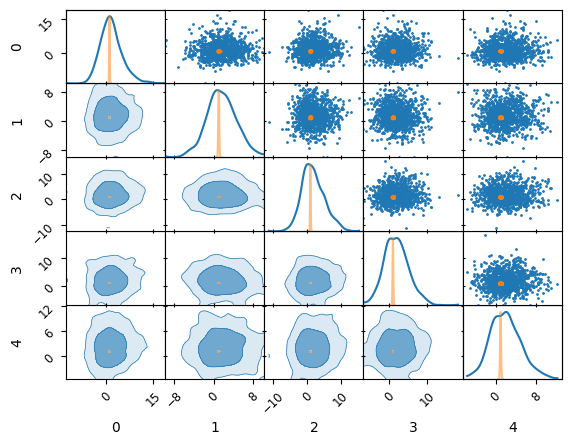

In [7]:
# x0=np.random.rand(1000,10)-4
# x1,x1_t=model.predict(x0,history=True)
x1,x1_t=model.sample_posterior(1000,history=True)
a=ns.MCMCSamples(x1).plot_2d(np.arange(dims))
chains.plot_2d(a,alpha=0.5);

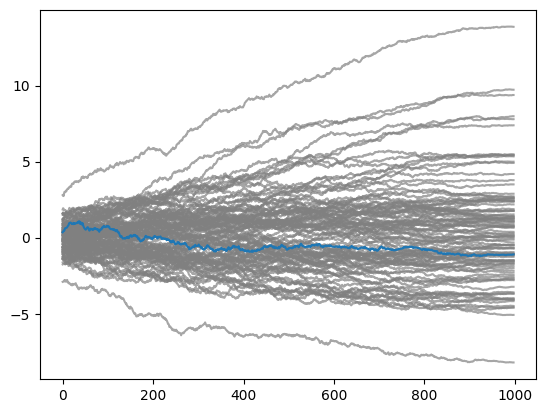

In [8]:
# x0=model.sample_prior(1000)
# x0=np.random.rand(1000,10)+-10
# x1,x1_t=model.predict(x0,history=True)
_,x1_t=model.sample_posterior(1000,history=True)
param_idx=0
plt.plot(x1_t[:,:100,param_idx], color="gray", alpha=0.7);
plt.plot(x1_t[:,101,param_idx], color="C0")

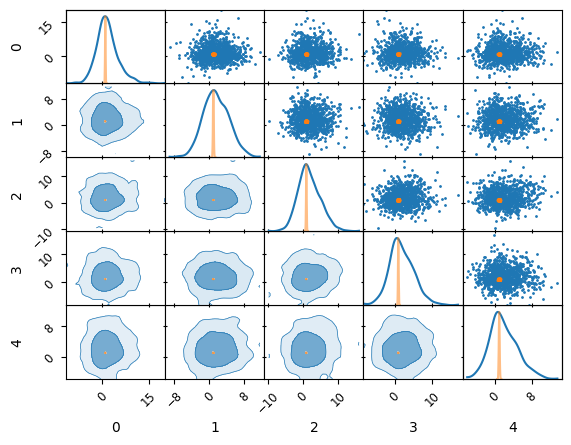

In [9]:
# x0=np.random.randn(100,5)*0.1
# x0=np.zeros((100,5))
# x1,x1_t=model.predict(x0,history=True)
x1,x1_t=model.sample_posterior(1000,history=True)

# a=ns.MCMCSamples(x0).plot_2d(np.arange(dims))
# ns.MCMCSamples(x1).plot_2d(a);
# a=ns.MCMCSamples(x1_t[500,...]).plot_2d(np.arange(dims))
a=ns.MCMCSamples(x1).plot_2d(np.arange(dims));
chains.plot_2d(a,alpha=0.5);
# chains.set_beta(0.6).plot_2d(a,alpha=0.5);

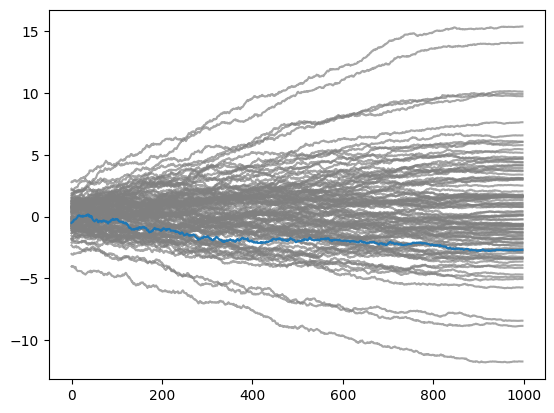

In [10]:
param_idx=0
plt.plot(x1_t[:,:100,param_idx], color="gray", alpha=0.7);
plt.plot(x1_t[:,101,param_idx], color="C0")

# Sequential Nested Diffusion

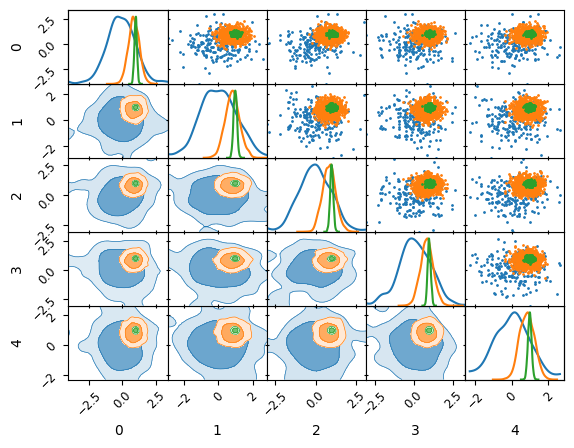

In [11]:
a=chains.set_beta(0.0).plot_2d(np.arange(dims))
chains.set_beta(0.05).plot_2d(a)
a=chains.plot_2d(a);

In [12]:
# chains=ns.read_chains("gaussian")
# model_1 = NestedDiffusionModel(chains,steps=1000)
# model_2 = NestedDiffusionModel(chains,steps=1000)


In [13]:
model_1.train(n_epochs=2000,batch_size=512,lr=1e-3,beta_prior=0.0,beta_posterior=0.01)
model_2.train(n_epochs=2000,batch_size=512,lr=1e-3,beta_prior=0.01,beta_posterior=1.0)

NameError: name 'model_1' is not defined

In [ ]:
x1,x1_t=model_1.sample_posterior(1000,history=True)
x2,x2_t=model_2.predict(x1,history=True)

In [ ]:
a=ns.MCMCSamples(x2).plot_2d(np.arange(dims))
a=ns.MCMCSamples(x1).plot_2d(a)
chains.plot_2d(a)

In [ ]:
f,a = plt.subplots(1,2,figsize=(10,5),sharey=True)
param_idx=2
a[0].plot(x1_t[:,:100,param_idx], color="gray", alpha=0.7);
a[0].plot(x1_t[:,101,param_idx], color="C0")
a[1].plot(x2_t[:,:100,param_idx], color="gray", alpha=0.7);
a[1].plot(x2_t[:,101,param_idx], color="C0")
# a[0].set_xscale("log")
# a[1].set_xscale("log")
a[0].set_xlim(0,1000)
a[1].set_xlim(0,1000)

plt.subplots_adjust(wspace=0)
